## MO444 Project 3 - Reinforcement Learning

* Rodrigo Araújo Marinho Franco - RA: 233569
* Felipe Marinho Tavares - RA: 265680

### Contributions:
* Rodrigo
 * ...
* Felipe
 * ...

# PART I - Evolutionary Model

# PART II - Reinforcement Learning

In [1]:
import sys
sys.path.append("search/")

import torch
import matplotlib.pyplot as plt

import environment

## Medium Environment - Training

Initial state:


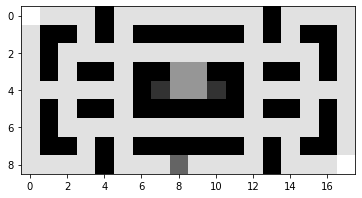

Shape:  (9, 18, 1)
Episode:  1 Average Score: -742.00 Average Number of actions: 462.00 Average Foods eaten: 22.00 Winrate: 0.00%
Episode:  100 Average Score: -58.44 Average Number of actions: 117.94 Average Foods eaten: 40.81 Winrate: 0.00%
Episode:  200 Average Score: 99.21 Average Number of actions: 109.19 Average Foods eaten: 50.66 Winrate: 0.00%
Episode:  300 Average Score: 197.73 Average Number of actions: 123.37 Average Foods eaten: 59.25 Winrate: 0.00%
Episode:  400 Average Score: 314.04 Average Number of actions: 116.46 Average Foods eaten: 66.23 Winrate: 6.00%
Episode:  500 Average Score: 487.81 Average Number of actions: 118.89 Average Foods eaten: 72.38 Winrate: 18.00%
Episode:  600 Average Score: 540.25 Average Number of actions: 117.25 Average Foods eaten: 75.82 Winrate: 20.00%
Episode:  700 Average Score: 570.07 Average Number of actions: 116.53 Average Foods eaten: 74.25 Winrate: 22.00%
Episode:  800 Average Score: 516.22 Average Number of actions: 124.48 Average Foods 

In [2]:
params = {
    "buffer_size": int(5e5),  # replay buffer size
    "batch_size": 32,        # minibatch size
    "gamma": 0.99,            # discount factor
    "tau": 1e-3,              # for soft update of target parameters
    "lr": 1e-3,               # learning rate
    "update_every": 10         # how often to update the network
}

# layouts = smallClassic, mediumClassic, originalClassic
layout = "mediumClassic"
env = environment.Environment(params, layout=layout, use_features=True)
checkpoint_filename = "checkpoint_{:}.pth".format(layout)

n_episodes = 10000
print_every = 100  # episodes
patience = 15      # max print_every without improvement tolarated
checkpoints_without_improvement = 0

best_score = {
    "episode_number": -1,
    "average_score": -1000.0,
    "average_num_actions": 0,
    "average_num_foods_eaten": 0,
    "winrate": 0.0
}
for i_episode in range(1, n_episodes + 1):
    env.reset()

    while not env.done():
        env.step()

    average_score, average_foods_eaten, average_num_actions, winrate = env.compute_scores()

    if i_episode == 1 or i_episode % print_every == 0:
        print("Episode: ", i_episode, end=" ")
        print('Average Score: {:.2f}'.format(average_score), end=" ")
        print('Average Number of actions: {:.2f}'.format(average_num_actions), end=" ")
        print('Average Foods eaten: {:.2f}'.format(average_foods_eaten), end=" ")
        print('Winrate: {:.2f}%'.format(winrate))

        if average_score > best_score["average_score"]:
            checkpoints_without_improvement = 0
            best_score["episode_number"] = i_episode
            best_score["average_score"] = average_score
            best_score["average_num_actions"] = average_num_actions
            best_score["average_num_foods_eaten"] = average_foods_eaten
            best_score["winrate"] = winrate
            torch.save(env.pacman.qnetwork_local.state_dict(), 'models/{:}'.format(checkpoint_filename))
        else:
            checkpoints_without_improvement += 1
            if checkpoints_without_improvement == patience:
                print("Stopping training due to lack of improvement")
                break

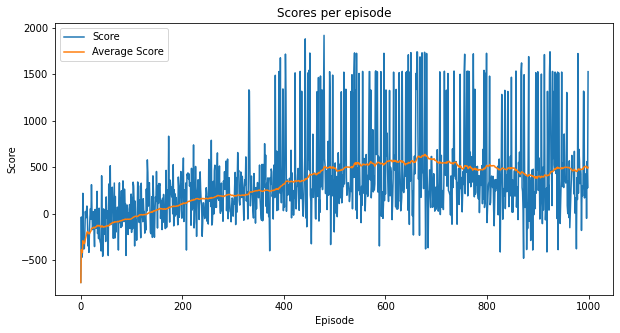

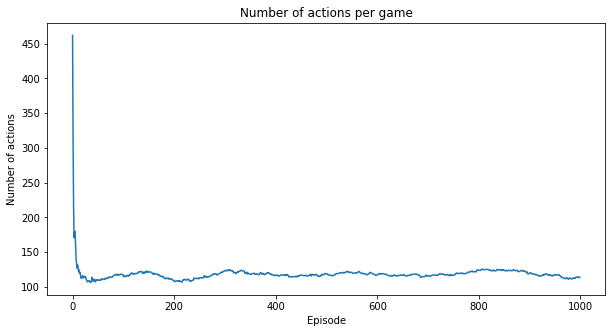

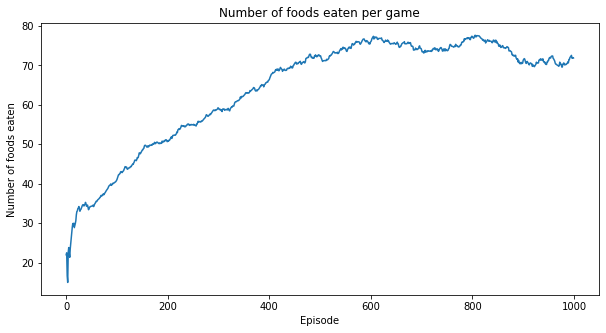

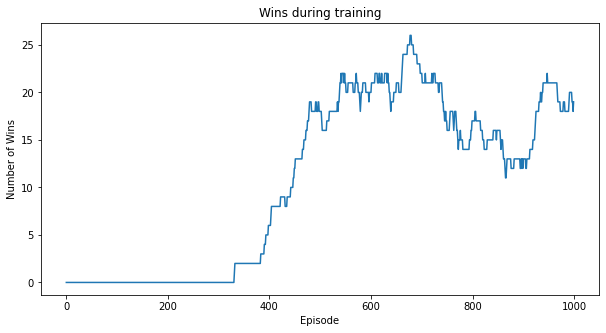

In [4]:
plt.figure(figsize=(10, 5))
plt.title("Scores per episode")
plt.xlabel('Episode')
plt.ylabel('Score')
line1, = plt.plot(env.scores)
line2, = plt.plot(env.average_scores)
plt.legend([line1, line2], ["Score", "Average Score"])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Number of actions per game")
plt.xlabel('Episode')
plt.ylabel('Number of actions')
line1, = plt.plot(env.average_num_actions)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Number of foods eaten per game")
plt.xlabel('Episode')
plt.ylabel('Number of foods eaten')
line1, = plt.plot(env.average_foods_eaten)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Wins during training")
plt.xlabel('Episode')
plt.ylabel('Winrate')
line1, = plt.plot(env.average_wins)
plt.show()